# Analyzing unstructured data with text mining

In [1]:
import sys
sys.path

['',
 'C:\\ProgramData\\Anaconda3\\python36.zip',
 'C:\\ProgramData\\Anaconda3\\DLLs',
 'C:\\ProgramData\\Anaconda3\\lib',
 'C:\\ProgramData\\Anaconda3',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Sphinx-1.5.6-py3.6.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\win32\\lib',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\Pythonwin',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\setuptools-27.2.0-py3.6.egg',
 'C:\\ProgramData\\Anaconda3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\AMD\\.ipython']

In [2]:
from twython import Twython

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from wordcloud import WordCloud
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
#from twython import Twython
import time
import json

There is a lot of unstructured data out there such as news articles, customer feedbacks, twitter tweets and various others and there are information that is there in them which would be very useful to analyze. Text Mining is a data mining technique which helps us in  performing analysis of this unstructured data.

In this chapter, we'll learn 

1. How to preprocess the data
2. Plot a wordcloud from the data
3. Word and Sentence Tokenization
4. Part of Speech Tagging
5. Stemming and Lemmatization
6. Applying Stanford's Named Entity Recognizer

## Preprocessing the data

We'll be using the reviews of Mad Max: Fury Road from bbc, forbes, guardian and movie pilot. We'll be performing the following on the data

1. Removing Punctuation
2. Removing Numbers
3. Converting text to lower case
4. Removing stopwords like be, the, on etc

Let's start by loading the data first


In [4]:
data = {}

#data['bbc'] =

data['bbc'] = open('./Data/madmax_review/bbc.txt','r',encoding="utf8").read()
data['forbes'] = open('./Data/madmax_review/forbes.txt','r',encoding="utf8").read()
data['guardian'] = open('./Data/madmax_review/guardian.txt','r',encoding="utf8").read()
data['moviepilot'] = open('./Data/madmax_review/moviepilot.txt','r',encoding="utf8").read()

In [5]:
data

{'bbc': "When the creator of a 1970s/1980s blockbuster franchise decides to dust it off again decades later, the results can be ... well, the results can be The Phantom Menace, Prometheus, or Indiana Jones and the Kingdom of the Crystal Skull: legacy-tarnishing messes that fans try to forget. And then there's Mad Max: Fury Road. The first Mad Max film to be made by George Miller in 30 years, this belated reboot is missing its original star, Mel Gibson, and its director has spent the intervening years on such children's fare as Happy Feet and Babe: Pig in the City. You might assume, then, that Fury Road would join The Phantom Menace on the scrapheap reserved for unloved revivals. And yet, somehow, this explosive new barrage of action and eccentricity isn't only a faithful continuation of the series, it's also its exhilarating high point. When Miller made his trilogy three decades ago, it seems, he was just revving up.\n\nFor the benefit of the uninitiated, the Mad Max films are set in a

We'll convert the text to lower case

In [6]:
data.keys()

dict_keys(['bbc', 'forbes', 'guardian', 'moviepilot'])

In [7]:
#Conversion to lower case
for k in data.keys():
    data[k] = data[k].lower()

In [8]:
print(data['bbc'][:800])

when the creator of a 1970s/1980s blockbuster franchise decides to dust it off again decades later, the results can be ... well, the results can be the phantom menace, prometheus, or indiana jones and the kingdom of the crystal skull: legacy-tarnishing messes that fans try to forget. and then there's mad max: fury road. the first mad max film to be made by george miller in 30 years, this belated reboot is missing its original star, mel gibson, and its director has spent the intervening years on such children's fare as happy feet and babe: pig in the city. you might assume, then, that fury road would join the phantom menace on the scrapheap reserved for unloved revivals. and yet, somehow, this explosive new barrage of action and eccentricity isn't only a faithful continuation of the series,


Now, we'll remove the punctuation from the text

In [9]:
#Removing punctuation
for k in data.keys():
    data[k] = re.sub(r'[-./?!,":;()\']',' ',data[k]) 

In [10]:
print(data['bbc'][:800])

when the creator of a 1970s 1980s blockbuster franchise decides to dust it off again decades later  the results can be     well  the results can be the phantom menace  prometheus  or indiana jones and the kingdom of the crystal skull  legacy tarnishing messes that fans try to forget  and then there s mad max  fury road  the first mad max film to be made by george miller in 30 years  this belated reboot is missing its original star  mel gibson  and its director has spent the intervening years on such children s fare as happy feet and babe  pig in the city  you might assume  then  that fury road would join the phantom menace on the scrapheap reserved for unloved revivals  and yet  somehow  this explosive new barrage of action and eccentricity isn t only a faithful continuation of the series 


We'll remove the numbers from the text

In [11]:
#Removing number
for k in data.keys():
    data[k] = re.sub('[-|0-9]',' ',data[k])

In [12]:
print(data['bbc'][:800])

when the creator of a     s     s blockbuster franchise decides to dust it off again decades later  the results can be     well  the results can be the phantom menace  prometheus  or indiana jones and the kingdom of the crystal skull  legacy tarnishing messes that fans try to forget  and then there s mad max  fury road  the first mad max film to be made by george miller in    years  this belated reboot is missing its original star  mel gibson  and its director has spent the intervening years on such children s fare as happy feet and babe  pig in the city  you might assume  then  that fury road would join the phantom menace on the scrapheap reserved for unloved revivals  and yet  somehow  this explosive new barrage of action and eccentricity isn t only a faithful continuation of the series 


Post this, we'll remove stopwords which are commonly occuring words such as ours, yours, that, this etc

In [13]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [14]:
data.keys()

dict_keys(['bbc', 'forbes', 'guardian', 'moviepilot'])

In [15]:
data['bbc'].split()

['when',
 'the',
 'creator',
 'of',
 'a',
 's',
 's',
 'blockbuster',
 'franchise',
 'decides',
 'to',
 'dust',
 'it',
 'off',
 'again',
 'decades',
 'later',
 'the',
 'results',
 'can',
 'be',
 'well',
 'the',
 'results',
 'can',
 'be',
 'the',
 'phantom',
 'menace',
 'prometheus',
 'or',
 'indiana',
 'jones',
 'and',
 'the',
 'kingdom',
 'of',
 'the',
 'crystal',
 'skull',
 'legacy',
 'tarnishing',
 'messes',
 'that',
 'fans',
 'try',
 'to',
 'forget',
 'and',
 'then',
 'there',
 's',
 'mad',
 'max',
 'fury',
 'road',
 'the',
 'first',
 'mad',
 'max',
 'film',
 'to',
 'be',
 'made',
 'by',
 'george',
 'miller',
 'in',
 'years',
 'this',
 'belated',
 'reboot',
 'is',
 'missing',
 'its',
 'original',
 'star',
 'mel',
 'gibson',
 'and',
 'its',
 'director',
 'has',
 'spent',
 'the',
 'intervening',
 'years',
 'on',
 'such',
 'children',
 's',
 'fare',
 'as',
 'happy',
 'feet',
 'and',
 'babe',
 'pig',
 'in',
 'the',
 'city',
 'you',
 'might',
 'assume',
 'then',
 'that',
 'fury',
 'road

In [16]:
#Removing stopwords
for k in data.keys():
    data[k] = data[k].split()
    #data[k] = data[k]

stopwords_list = stopwords.words('english')
stopwords_list = stopwords_list + ['mad','max','film','fury','miller','road']

for k in data.keys():
    data[k] = [ w for w in data[k] if not w in stopwords_list ]
    
print(data['bbc'][:80])

['creator', 'blockbuster', 'franchise', 'decides', 'dust', 'decades', 'later', 'results', 'well', 'results', 'phantom', 'menace', 'prometheus', 'indiana', 'jones', 'kingdom', 'crystal', 'skull', 'legacy', 'tarnishing', 'messes', 'fans', 'try', 'forget', 'first', 'made', 'george', 'years', 'belated', 'reboot', 'missing', 'original', 'star', 'mel', 'gibson', 'director', 'spent', 'intervening', 'years', 'children', 'fare', 'happy', 'feet', 'babe', 'pig', 'city', 'might', 'assume', 'would', 'join', 'phantom', 'menace', 'scrapheap', 'reserved', 'unloved', 'revivals', 'yet', 'somehow', 'explosive', 'new', 'barrage', 'action', 'eccentricity', 'faithful', 'continuation', 'series', 'also', 'exhilarating', 'high', 'point', 'made', 'trilogy', 'three', 'decades', 'ago', 'seems', 'revving', 'benefit', 'uninitiated', 'films']


In [17]:
print(data['bbc'])

['creator', 'blockbuster', 'franchise', 'decides', 'dust', 'decades', 'later', 'results', 'well', 'results', 'phantom', 'menace', 'prometheus', 'indiana', 'jones', 'kingdom', 'crystal', 'skull', 'legacy', 'tarnishing', 'messes', 'fans', 'try', 'forget', 'first', 'made', 'george', 'years', 'belated', 'reboot', 'missing', 'original', 'star', 'mel', 'gibson', 'director', 'spent', 'intervening', 'years', 'children', 'fare', 'happy', 'feet', 'babe', 'pig', 'city', 'might', 'assume', 'would', 'join', 'phantom', 'menace', 'scrapheap', 'reserved', 'unloved', 'revivals', 'yet', 'somehow', 'explosive', 'new', 'barrage', 'action', 'eccentricity', 'faithful', 'continuation', 'series', 'also', 'exhilarating', 'high', 'point', 'made', 'trilogy', 'three', 'decades', 'ago', 'seems', 'revving', 'benefit', 'uninitiated', 'films', 'set', 'lawless', 'post', 'apocalyptic', 'dystopia', 'oil', 'scarce', 'bands', 'scavengers', 'career', 'around', 'souped', 'stock', 'cars', 'given', 'future', 'world', 'consist

## Creating the Word Cloud

We'll be using Word Cloud package by amueller. You can download it with the following command if you are using Ubuntu

sudo pip install git+git://github.com/amueller/word_cloud.git

Or you can follow the instruction through the following link https://github.com/amueller/word_cloud

Let's plot the wordcloud for BBC

In [27]:
data['bbc']

['When',
 'creator',
 'blockbuster',
 'franchise',
 'decides',
 'dust',
 'decades',
 'later',
 'results',
 'well',
 'results',
 'The',
 'Phantom',
 'Menace',
 'Prometheus',
 'Indiana',
 'Jones',
 'Kingdom',
 'Crystal',
 'Skull',
 'legacy',
 'tarnishing',
 'messes',
 'fans',
 'try',
 'forget',
 'And',
 'Mad',
 'Max',
 'Fury',
 'Road',
 'The',
 'first',
 'Mad',
 'Max',
 'made',
 'George',
 'Miller',
 'years',
 'belated',
 'reboot',
 'missing',
 'original',
 'star',
 'Mel',
 'Gibson',
 'director',
 'spent',
 'intervening',
 'years',
 'children',
 'fare',
 'Happy',
 'Feet',
 'Babe',
 'Pig',
 'City',
 'You',
 'might',
 'assume',
 'Fury',
 'Road',
 'would',
 'join',
 'The',
 'Phantom',
 'Menace',
 'scrapheap',
 'reserved',
 'unloved',
 'revivals',
 'And',
 'yet',
 'somehow',
 'explosive',
 'new',
 'barrage',
 'action',
 'eccentricity',
 'faithful',
 'continuation',
 'series',
 'also',
 'exhilarating',
 'high',
 'point',
 'When',
 'Miller',
 'made',
 'trilogy',
 'three',
 'decades',
 'ago',
 

In [26]:
' '.join(data['bbc'])

'When creator blockbuster franchise decides dust decades later results well results The Phantom Menace Prometheus Indiana Jones Kingdom Crystal Skull legacy tarnishing messes fans try forget And Mad Max Fury Road The first Mad Max made George Miller years belated reboot missing original star Mel Gibson director spent intervening years children fare Happy Feet Babe Pig City You might assume Fury Road would join The Phantom Menace scrapheap reserved unloved revivals And yet somehow explosive new barrage action eccentricity faithful continuation series also exhilarating high point When Miller made trilogy three decades ago seems revving For benefit uninitiated Mad Max films set lawless post apocalyptic dystopia oil scarce bands scavengers career around souped stock cars Given future world consists largely sand b petrol short supply odd populace devoted internal combustion engine Miller franchise always absurd It gusto flair commits absurdity makes exciting Welcome land everyone sports pun

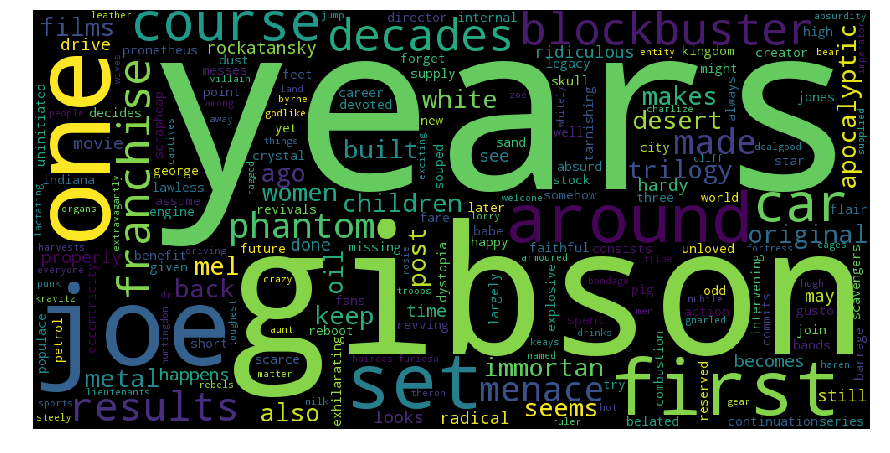

In [18]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['bbc']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

From the above Word Cloud, we can make out that there is mention about the time between the previous and current movie. The article talks about Mel Gibson , the cars and the villain Immortan Joe as these are the most frequently occuring keywords. There is also emphasis on different aspects of the movie given by the keyword "one"

Now let's see how it looks like for Forbes. 

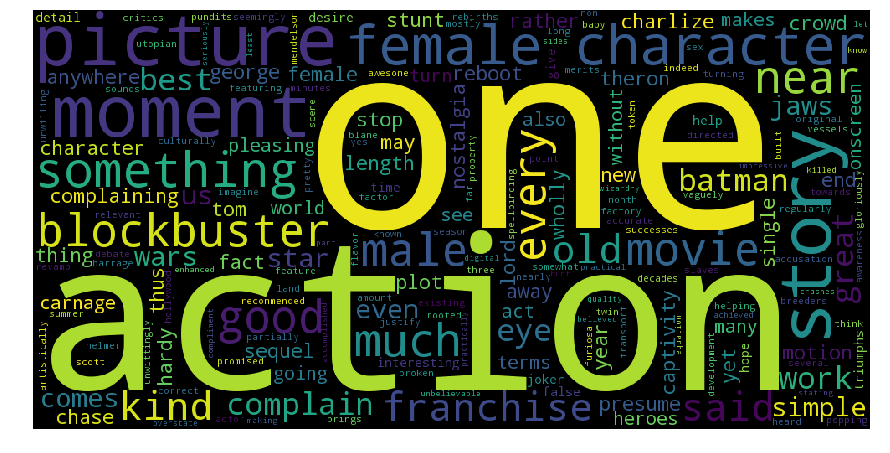

In [102]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['forbes']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

Forbes talks about the female characters more. 

The following is for the Guardian

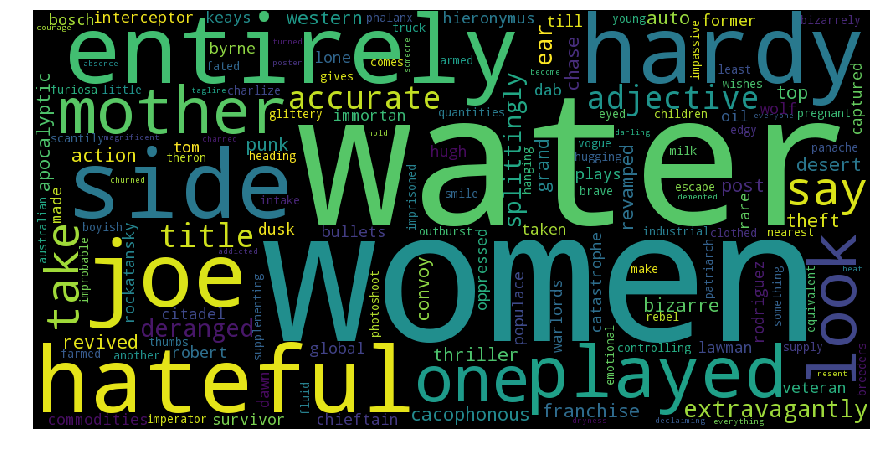

In [103]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['guardian']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The Guardian has emphasis over the female characters and lack of water in the wasteland.

Finally, the moviepilot

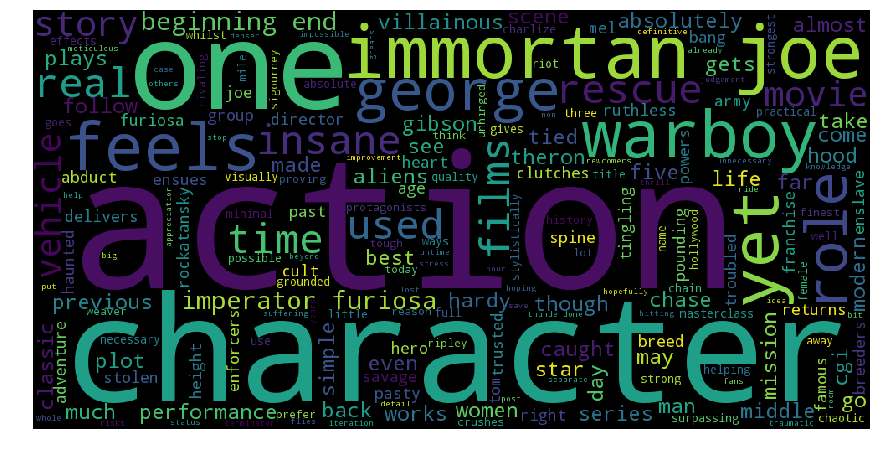

In [104]:
wordcloud = WordCloud(width = 1000, height = 500).generate(' '.join(data['moviepilot']))
plt.figure(figsize=(15,8))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

The moviepilot has emphasis on immortan joe, the characters in general and way boys shown in the film.

## Word and Sentence Tokenization

We had done word tokenization previously but we can perform the word tokenization using NLTK as well as sentence tokenization which is quite tricky as the english language has period symbols for abbreviation and other purposes.Thankfully, the sentence tokenizer is a  instance of the PunktSentenceTokenizer from tokenize.punkt module of nltk which helps in tokenizing sentences.

Let's look at word tokenization

In [19]:
#Loading the forbes data
data = open('C:/Users/AMD/Documents/Python_URP/1_Notebook/Data/madmax_review/forbes.txt','r').read()

In [20]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
data[:600]

"Pundits and critics like to blame the twin successes of Jaws and Star Wars for turning Hollywood into something of a blockbuster factory. We can debate the merits of said accusation, but for me it comes down to one simple factor: If every would-be blockbuster, or even most would-be blockbusters were as good as Jaws and/or Star Wars, I imagine most of us wouldn't be complaining nearly as much. That brings us to George Miller's Mad Max: Fury Road. It is a revamp/reboot/sequel for a 30-year old franchise, directed by the original helmer who hasn't been culturally relevant in decades, featuring a "

In [22]:
word_data = nltk.word_tokenize(data)

In [23]:
data[:186]

'Pundits and critics like to blame the twin successes of Jaws and Star Wars for turning Hollywood into something of a blockbuster factory. We can debate the merits of said accusation, but'

In [24]:
word_data[:16]

['Pundits',
 'and',
 'critics',
 'like',
 'to',
 'blame',
 'the',
 'twin',
 'successes',
 'of',
 'Jaws',
 'and',
 'Star',
 'Wars',
 'for',
 'turning']

Now, let's perform the sentence tokenization of the forbes article

In [25]:
sent_tokenize(data)[:5]

['Pundits and critics like to blame the twin successes of Jaws and Star Wars for turning Hollywood into something of a blockbuster factory.',
 "We can debate the merits of said accusation, but for me it comes down to one simple factor: If every would-be blockbuster, or even most would-be blockbusters were as good as Jaws and/or Star Wars, I imagine most of us wouldn't be complaining nearly as much.",
 "That brings us to George Miller's Mad Max: Fury Road.",
 "It is a revamp/reboot/sequel for a 30-year old franchise, directed by the original helmer who hasn't been culturally relevant in decades, featuring a new and somewhat flavor-of-the-month actor, and seemingly only existing because of the fact that the property is vaguely known and thus has a token amount of built-in awareness.",
 "If  you think that sounds like the kind of thing I complain about rather regularly, you'd be correct."]

## Part of Speech Tagging

Part of Speech tagging is one of the important task of text analysis. It helps in tagging each of the word based on the context of the sentence or the role the word is playing in the sentence.

Let's see how to perform part of speech taggin using NLTK

In [26]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [27]:
pos_word_data = nltk.pos_tag(word_data)

In [28]:
pos_word_data[ : 10]

[('Pundits', 'NNS'),
 ('and', 'CC'),
 ('critics', 'NNS'),
 ('like', 'IN'),
 ('to', 'TO'),
 ('blame', 'VB'),
 ('the', 'DT'),
 ('twin', 'NN'),
 ('successes', 'NNS'),
 ('of', 'IN')]

You can see the tags like NNS, CC, IN , TO, DT and NN. Let's see what they mean 

In [64]:
nltk.download('book')

[nltk_data] Downloading collection 'book'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\abc.zip.
[nltk_data]    | Downloading package brown to
[nltk_data]    |     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\brown.zip.
[nltk_data]    | Downloading package chat80 to
[nltk_data]    |     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\chat80.zip.
[nltk_data]    | Downloading package cmudict to
[nltk_data]    |     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\cmudict.zip.
[nltk_data]    | Downloading package conll2000 to
[nltk_data]    |     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping corpora\conll2000.zip.
[nltk_data]    | Downloading package conll2002 to
[nltk_data]    |     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]    |   Unzipping cor

True

In [66]:
nltk.help.upenn_tagset('NNS')

NNS: noun, common, plural
    undergraduates scotches bric-a-brac products bodyguards facets coasts
    divestitures storehouses designs clubs fragrances averages
    subjectivists apprehensions muses factory-jobs ...


In [67]:
nltk.help.upenn_tagset('NN')

NN: noun, common, singular or mass
    common-carrier cabbage knuckle-duster Casino afghan shed thermostat
    investment slide humour falloff slick wind hyena override subhumanity
    machinist ...


In [68]:
nltk.help.upenn_tagset('IN')

IN: preposition or conjunction, subordinating
    astride among uppon whether out inside pro despite on by throughout
    below within for towards near behind atop around if like until below
    next into if beside ...


In [69]:
nltk.help.upenn_tagset('TO')

TO: "to" as preposition or infinitive marker
    to


In [70]:
nltk.help.upenn_tagset('DT')

DT: determiner
    all an another any both del each either every half la many much nary
    neither no some such that the them these this those


In [71]:
nltk.help.upenn_tagset('CC')

CC: conjunction, coordinating
    & 'n and both but either et for less minus neither nor or plus so
    therefore times v. versus vs. whether yet


In [29]:
nltk.help.upenn_tagset('VB')

VB: verb, base form
    ask assemble assess assign assume atone attention avoid bake balkanize
    bank begin behold believe bend benefit bevel beware bless boil bomb
    boost brace break bring broil brush build ...


You can see that the words get tagged well. This tagging can help us in creating heuristics over the data and then extracting information out of it. For example, we can take out all the nouns in our article and analyze the theme around which the article is about.

## Stemming and Lemmatization

### Stemming

Stemming is process of reducing a word to its root form. The root form is not a word by itself but words can be formed by adding the right suffic to it.

If you take fish, fishes and fishing, they all can be be stemmed to fishing. Also study, studying and studies can be stemmed to studi which is not part of the English Language.

There are various types of stemming algorithm like Porter, Lancaster, Snowball etc. 

Let's try out the Porter Stemming Algorithm

In [72]:
word_data[:20]

['Pundits',
 'and',
 'critics',
 'like',
 'to',
 'blame',
 'the',
 'twin',
 'successes',
 'of',
 'Jaws',
 'and',
 'Star',
 'Wars',
 'for',
 'turning',
 'Hollywood',
 'into',
 'something',
 'of']

In [30]:
from nltk.stem.porter import PorterStemmer

porter_stemmer = PorterStemmer()

for w in word_data[:20]:
    print ("Actual: %s  Stem: %s"  % (w,porter_stemmer.stem(w)))


Actual: Pundits  Stem: pundit
Actual: and  Stem: and
Actual: critics  Stem: critic
Actual: like  Stem: like
Actual: to  Stem: to
Actual: blame  Stem: blame
Actual: the  Stem: the
Actual: twin  Stem: twin
Actual: successes  Stem: success
Actual: of  Stem: of
Actual: Jaws  Stem: jaw
Actual: and  Stem: and
Actual: Star  Stem: star
Actual: Wars  Stem: war
Actual: for  Stem: for
Actual: turning  Stem: turn
Actual: Hollywood  Stem: hollywood
Actual: into  Stem: into
Actual: something  Stem: someth
Actual: of  Stem: of


Let's try out the Lancaster Algorithm

In [31]:
from nltk.stem.lancaster import LancasterStemmer

lancaster_stemmer = LancasterStemmer()

for w in word_data[:20]:
    print("Actual: %s  Stem: %s"  % (w,lancaster_stemmer.stem(w)))


Actual: Pundits  Stem: pundit
Actual: and  Stem: and
Actual: critics  Stem: crit
Actual: like  Stem: lik
Actual: to  Stem: to
Actual: blame  Stem: blam
Actual: the  Stem: the
Actual: twin  Stem: twin
Actual: successes  Stem: success
Actual: of  Stem: of
Actual: Jaws  Stem: jaw
Actual: and  Stem: and
Actual: Star  Stem: star
Actual: Wars  Stem: war
Actual: for  Stem: for
Actual: turning  Stem: turn
Actual: Hollywood  Stem: hollywood
Actual: into  Stem: into
Actual: something  Stem: someth
Actual: of  Stem: of


Now, let's try out the Snowball Algorithm

In [32]:
from nltk.stem.snowball import SnowballStemmer

snowball_stemmer = SnowballStemmer("english")

for w in word_data[:20]:
    print("Actual: %s  Stem: %s"  % (w,snowball_stemmer.stem(w)))


Actual: Pundits  Stem: pundit
Actual: and  Stem: and
Actual: critics  Stem: critic
Actual: like  Stem: like
Actual: to  Stem: to
Actual: blame  Stem: blame
Actual: the  Stem: the
Actual: twin  Stem: twin
Actual: successes  Stem: success
Actual: of  Stem: of
Actual: Jaws  Stem: jaw
Actual: and  Stem: and
Actual: Star  Stem: star
Actual: Wars  Stem: war
Actual: for  Stem: for
Actual: turning  Stem: turn
Actual: Hollywood  Stem: hollywood
Actual: into  Stem: into
Actual: something  Stem: someth
Actual: of  Stem: of


Porter is the most commonly used stemmer. It is also on of the most gentle stemmers. It is also the one of the most computationally intensive of the algorithms. 

Snowball is regarded as an improvement over porter. Porter himself in fact admits that Snowball is better than his algorithm. 

Lancaster is a very aggressive stemming algorithm and sometimes to a fault. With porter and snowball, the stemmed representations are usually fairly understandable to a reader but not so with Lancaster as many shorter words becomes totally obfuscated. Lancaster is the fastest algorithm here, and will reduce your working set of words hugely, but if you want more distinction it is not the tool that you would want.



### Lemmatization

Lemmatization is similar to stemming but it groups together similar together to a Lemma.

We'll use WordNet's Lemmatization 

In [33]:
#import nltk
nltk.download('wordnet')
# Download window opens, fetch wordnet
from nltk.corpus import wordnet as wn

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\AMD\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [34]:
from nltk.stem import WordNetLemmatizer

wordnet_lemmatizer = WordNetLemmatizer()

for w in word_data[:30]:
    print("Actual: %s  Lemma: %s"  % (w,wordnet_lemmatizer.lemmatize(w)))
    


Actual: Pundits  Lemma: Pundits
Actual: and  Lemma: and
Actual: critics  Lemma: critic
Actual: like  Lemma: like
Actual: to  Lemma: to
Actual: blame  Lemma: blame
Actual: the  Lemma: the
Actual: twin  Lemma: twin
Actual: successes  Lemma: success
Actual: of  Lemma: of
Actual: Jaws  Lemma: Jaws
Actual: and  Lemma: and
Actual: Star  Lemma: Star
Actual: Wars  Lemma: Wars
Actual: for  Lemma: for
Actual: turning  Lemma: turning
Actual: Hollywood  Lemma: Hollywood
Actual: into  Lemma: into
Actual: something  Lemma: something
Actual: of  Lemma: of
Actual: a  Lemma: a
Actual: blockbuster  Lemma: blockbuster
Actual: factory  Lemma: factory
Actual: .  Lemma: .
Actual: We  Lemma: We
Actual: can  Lemma: can
Actual: debate  Lemma: debate
Actual: the  Lemma: the
Actual: merits  Lemma: merit
Actual: of  Lemma: of


## Stanford's Named Entity Recognizer

Named Entity Recognizer is a task to classify the elements of a sentence to categories such as Person, Organization, Locations etc.
Stanford's Named Entity Recognizer is one of the most popular one out there.

The stanford's Named Entity Recognizer can be downloaded here http://nlp.stanford.edu/software/stanford-ner-2014-06-16.zip

In [81]:
#from nltk.tag.stanford import NERTagger
from nltk.tag import StanfordNERTagger

In [93]:
st = StanfordNERTagger('./Data/classifiers/english.all.3class.distsim.crf.ser.gz', './Data/stanford-ner.jar',encoding='utf-8')

In [96]:
#from nltk.tag.stanford import NERTagger
st.tag('''Barrack Obama is the president of the United States of America . His father is from Kenya and Mother from United States of America. He has two daughters with his wife. He has strong opposition in Congress due to Republicans'''.split()) 

LookupError: 

===========================================================================
NLTK was unable to find the java file!
Use software specific configuration paramaters or set the JAVAHOME environment variable.
===========================================================================

You can see that the Stanford Named Entity Tagger does a pretty good job in tagging the Person, Location and Organization

## Sentiment Analysis on World Leaders using twitter 

Before we start off analyzing tweets, we'll need to install the Twython package of python to get the tweets from twitter from the following link.

https://github.com/ryanmcgrath/twython

Also, you need to get the consumer key and consumer secret key by going using this link https://apps.twitter.com/app/new

<img src="files/images/twitter_app.png">

Once you have given the details about your app. You'll get the consumer key and consumer secret key

<img src="files/images/twitter_app_token.png">


After this go to the Key and Access Tokens tabs to generate your access token .

<img src="files/images/twitter_access_token.png">

Once you have the required keys, we'll add the details to the following code

In [35]:
#Please provide your keys here
TWITTER_APP_KEY = 'yBlT3HzvFgvEBDkABZq9VDyAd' 
TWITTER_APP_KEY_SECRET = 'cbcKGBi1QD2zkAlceJKnSHB9EhgbaEwEzTOglMS3U1BrXYRMN3' 
TWITTER_ACCESS_TOKEN = '777727640388055040-OS0Ps1vAwRXBpPmao9g2Yazabyef8bu'
TWITTER_ACCESS_TOKEN_SECRET = 'pe3W8KfE1mpTK7jydXJai37eO7m6MWgCqzzALTXsfJVQt'

In [36]:
t = Twython(app_key=TWITTER_APP_KEY, 
            app_secret=TWITTER_APP_KEY_SECRET, 
            oauth_token=TWITTER_ACCESS_TOKEN, 
            oauth_token_secret=TWITTER_ACCESS_TOKEN_SECRET)

In [37]:
def get_tweets(twython_object, query, n):
    count = 0
    result_generator = twython_object.cursor(twython_object.search, q = query)
    result_set = []
    for r in result_generator:
        result_set.append(r['text'])
        count += 1
        if count == n: break
    
    return result_set

Now, we have access to the twitter tweets and we can fetch them now.

We'll be analyzing the sentiment of the tweets for Obama, Putin, Modi, Xi Jin Ping, and David Cameron. There are few assumptions that we'll be making for our analysis
1. The tweets are in english
2. We are limiting to 500 tweets 

You can load the tweets from the following json file

In [38]:
with open('politician_tweets.json', 'w') as fp:
    tweets=json.load(fp)

UnsupportedOperation: not readable

In [40]:
tweets['obama']

['rt @bfraser747  why is  uraniumone just coming to light now   obama &amp  his administration tried to cover all this stuff up  he needs to answ…',
 'rt @imjustamel   signsyoureabadpresident\n\nwhen you use the\n✔irs\n✔cia\n✔nsa\n✔fbi\n\nto target citizens because they are conservatives \n\n obama…',
 'rt @jaysekulow  the @aclj is demanding documents on the  obama admin ’s absurd approval of the  uraniumone nuclear deal  https   t co ku53a…',
 'rt @monsterbehr  uranium one matters   ☠️\n uranium1  hillary  clintoncash  obama  bill https   t co api9kcd9v2',
 'rt @andersondrlja  the absolute irony and or hypocrisy of  obama &amp   hillary s use of the   russiascandal against trump is outrageous \nlike&amp …',
 'rt @imjustamel   signsyoureabadpresident\n\nwhen you use the\n✔irs\n✔cia\n✔nsa\n✔fbi\n\nto target citizens because they are conservatives \n\n obama…',
 'rt @bayareact  a must watch  @uncle_jimbo discusses w  @liz_wheeler the crimes &amp  cover up by  hillary &amp   obama of  ura

Or you can fetch the fresh tweets of the these politicians.

In [39]:
tweets = {}
max_tweets = 500
tweets['obama'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower()) for tweet in get_tweets(t,'#obama', max_tweets)]
tweets['putin'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower()) for tweet in get_tweets(t,'#putin', max_tweets)]
tweets['modi'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower()) for tweet in get_tweets(t,'#modi', max_tweets)]
tweets['xijinping'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower()) for tweet in get_tweets(t,'#xijinping', max_tweets)]
tweets['davidcameron'] = [re.sub(r'[-.#/?!,":;()\']',' ',tweet.lower()) for tweet in get_tweets(t,'#davidcameron', max_tweets)]

TwythonRateLimitError: Twitter API returned a 429 (Too Many Requests), Rate limit exceeded

Now, lets define a function to score the sentiments of the tweets. We have positive and negative word list which will be used to compare the tweets and give the tweet a score. Every postive word that matches will be given +1 point and everey negative score that is captured will be given -1 point.

In [41]:
positive_words = open('positive-words.txt').read().split('\n')
negative_words = open('negative-words.txt').read().split('\n')

In [42]:
positive_words

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation',
 'accolade',
 'accolades',
 'accommodative',
 'accomodative',
 'accomplish',
 'accomplished',
 'accomplishment',
 'accomplishments',
 'accurate',
 'accurately',
 'achievable',
 'achievement',
 'achievements',
 'achievible',
 'acumen',
 'adaptable',
 'adaptive',
 'adequate',
 'adjustable',
 'admirable',
 'admirably',
 'admiration',
 'admire',
 'admirer',
 'admiring',
 'admiringly',
 'adorable',
 'adore',
 'adored',
 'adorer',
 'adoring',
 'adoringly',
 'adroit',
 'adroitly',
 'adulate',
 'adulation',
 'adulatory',
 'advanced',
 'advantage',
 'advantageous',
 'advantageously',
 'advantages',
 'adventuresome',
 'adventurous',
 'advocate',
 'advocated',
 'advocates',
 'affability',
 'affable',
 'affably',
 'affectation',
 'affection',
 'affectionate',
 'affinity',
 'affirm',
 'affirmation',
 'affirmative',
 'affluence',
 'affluent',
 'afford',
 'affordable',
 'af

In [43]:
def sentiment_score(text, pos_list, neg_list):
    positive_score = 0
    negative_score = 0
    
    for w in text.split(' '):
        if w in pos_list: positive_score+=1
        if w in neg_list: negative_score+=1
            
    return positive_score - negative_score

Let's now score the sentiments of each tweet in the list

In [44]:
tweets['obama'][0:2]

['rt @bfraser747  why is  uraniumone just coming to light now   obama &amp  his administration tried to cover all this stuff up  he needs to answ…',
 'rt @imjustamel   signsyoureabadpresident\n\nwhen you use the\n✔irs\n✔cia\n✔nsa\n✔fbi\n\nto target citizens because they are conservatives \n\n obama…']

In [47]:
tweets_sentiment = {}
tweets_sentiment['obama'] = [ sentiment_score(tweet,positive_words,negative_words) for tweet in  tweets['obama'] ]
tweets_sentiment['putin'] = [ sentiment_score(tweet,positive_words,negative_words) for tweet in tweets['putin'] ]
tweets_sentiment['modi'] = [ sentiment_score(tweet,positive_words,negative_words) for tweet in tweets['modi'] ]
tweets_sentiment['xijinping'] = [ sentiment_score(tweet,positive_words,negative_words) for tweet in tweets['xijinping'] ]
tweets_sentiment['davidcameron'] = [ sentiment_score(tweet,positive_words,negative_words) for tweet in tweets['davidcameron'] ]

KeyError: 'xijinping'

In [ ]:
tweets_sentiment

We have defined a dict called tweets_sentiment where we have scored the sentiments of each of the tweets for the politicians.

Now as we have the sentiment score for each of the politicians, we'll now analyze the sentiments for each of the politcians

Let's see how people are feeling about Obama

In [48]:
tweets_sentiment['obama']

[0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 -2,

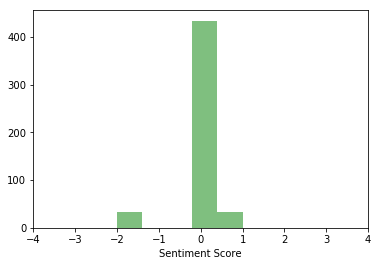

In [49]:
obama = plt.hist(tweets_sentiment['obama'], 5, facecolor='green', alpha=0.5)
plt.xlabel('Sentiment Score')
_=plt.xlim([-4,4])

Mostly, neutral tweets about Obama.

Let's see how its for Putin

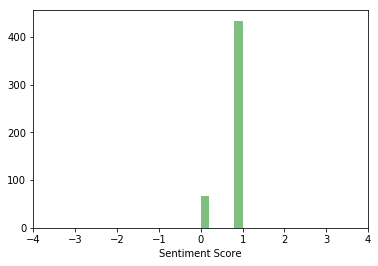

In [50]:
putin = plt.hist(tweets_sentiment['putin'], 5, facecolor='green', alpha=0.5)
plt.xlabel('Sentiment Score')
_=plt.xlim([-4,4])

Mostly, tweets are neutral with slight negativity

Let's see how it is for Modi.

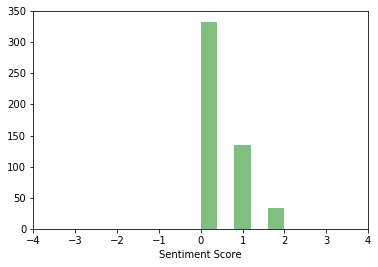

In [51]:
modi = plt.hist(tweets_sentiment['modi'], 5, facecolor='green', alpha=0.5)
plt.xlabel('Sentiment Score')
_=plt.xlim([-4,4])

Mostly, the tweets are neutral for Modi with slight positivity.

Let's see for Xi Jin Ping.

In [52]:
xijinping = plt.hist(tweets_sentiment['xijinping'], 5, facecolor='green', alpha=0.5)
plt.xlabel('Sentiment Score')
_=plt.xlim([-4,4])

KeyError: 'xijinping'

So Xi Jin Ping also mostly Negative tweets.

In [53]:
davidcameron = plt.hist(tweets_sentiment['davidcameron'], 5, facecolor='green', alpha=0.5)
plt.xlabel('Sentiment Score')
_=plt.xlim([-4,4])

KeyError: 'davidcameron'

The tweets for David Cameron is inclined more towards positive side.